# Qudit Non-Multiplicativity in the Communication Value of the Anti-Symmetric Projector Choi Matrix

In [1]:
using CVChannel
using Plots
using LinearAlgebra
using QBase
using Test

In this notebook we numerically verify the super-multiplicativity of the channel $\mathcal{N}$ whose Choi matrix is

$$
J_{\mathcal{N}} = \frac{1}{d-1} (\mathbb{I}\otimes\mathbb{I} - \mathbb{F})
$$

where $\mathbb{F}$ is a swap operator for two qudit states with dimension $d$. This choi matrix is simply the anti-symmetric component of the Werner-Holevo channel. 

In [2]:
anti_sym_WH(ρ) = wernerHolevoChannel(ρ, 0)
anti_sym_WH_choi(d) = real.(choi(anti_sym_WH, d, d))

# qutrit example
anti_sym_WH_choi(3)

9×9 Array{Float64,2}:
 0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0  0.0
 0.0   0.5   0.0  -0.5  0.0   0.0   0.0   0.0  0.0
 0.0   0.0   0.5   0.0  0.0   0.0  -0.5   0.0  0.0
 0.0  -0.5   0.0   0.5  0.0   0.0   0.0   0.0  0.0
 0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0  0.0
 0.0   0.0   0.0   0.0  0.0   0.5   0.0  -0.5  0.0
 0.0   0.0  -0.5   0.0  0.0   0.0   0.5   0.0  0.0
 0.0   0.0   0.0   0.0  0.0  -0.5   0.0   0.5  0.0
 0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0  0.0

It may not be apparent that the above matrix is a completely-positive trace-preserving (CPTP) map.
To prove this assertion, we will numerically demonstrate that the Choi matrix $J_\mathcal{N}$ factorizes into the form

$$
J_\mathcal{N} = \sum_{i,j}\vert i\rangle\langle j \vert \otimes \mathcal{N}(|i\rangle\langle j|) = \sum_{i,j,k}\vert i\rangle\langle j \vert \otimes K_k|i\rangle\langle j|K_k^{\dagger}
$$

where $\{K_k\}_{k=1}^{d^2}$ is a set of Kraus operators which satisfy $\sum_k K_k K_k^{\dagger} = \mathbb{I}$.
The Kraus operators can be derived by reshaping the columns of the Choi matrix into $d\times d$ matrices and scaling the resulting kraus operators by $\sqrt{\frac{d-1}{2}}$.

In [3]:
function E(d,i,j)
    matrix = zeros(d,d)
    matrix[i,j] = 1
    return matrix
end

@testset "(d = $d) Anti-Symmetric Projector Choi Matrix is a CPTP Map" for d in 2:16
    J_𝒩 = anti_sym_WH_choi(d)
    kraus_ops = map(v -> reshape(v, (d,d))*sqrt((d-1)/2), eachcol(J_𝒩))
    
    @test sum(k -> k*k', kraus_ops) ≈ Matrix(I, (d,d))
    
    reconstructed_J_𝒩 = sum(i -> sum(j -> sum(k -> kron(E(d,i,j), k*E(d,i,j)k'), kraus_ops), 1:d), 1:d)
    
    @test reconstructed_J_𝒩 ≈ J_𝒩
end;

Test Summary:                                              | Pass  Total
(d = 2) Anti-Symmetric Projector Choi Matrix is a CPTP Map |    2      2
Test Summary:                                              | Pass  Total
(d = 3) Anti-Symmetric Projector Choi Matrix is a CPTP Map |    2      2
Test Summary:                                              | Pass  Total
(d = 4) Anti-Symmetric Projector Choi Matrix is a CPTP Map |    2      2
Test Summary:                                              | Pass  Total
(d = 5) Anti-Symmetric Projector Choi Matrix is a CPTP Map |    2      2
Test Summary:                                              | Pass  Total
(d = 6) Anti-Symmetric Projector Choi Matrix is a CPTP Map |    2      2
Test Summary:                                              | Pass  Total
(d = 7) Anti-Symmetric Projector Choi Matrix is a CPTP Map |    2      2
Test Summary:                                              | Pass  Total
(d = 8) Anti-Symmetric Projector Choi Matrix is a C

## Theoretical Scaling of Communication Value

The communication value of the considered channel, is known to be super-multiplicative.
As the dimension $d$ increases, the communication values of $\mathcal{N}$ and $\mathcal{N}\otimes\mathcal{N}$ scale as

$$
\text{cv}(\mathcal{N}) = \frac{d}{d-1},\quad \text{and} \quad \text{cv}(\mathcal{N}\otimes\mathcal{N}) = \frac{2d}{d-1}.
$$

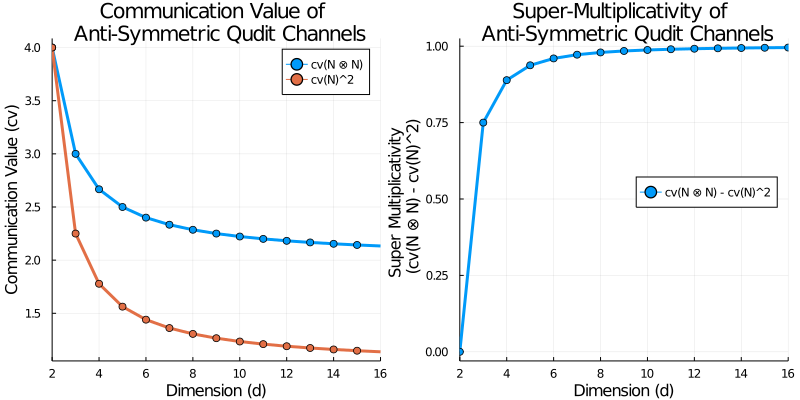

In [10]:
cv_𝒩(d) = d/(d-1)
cv_𝒩2(d) = 2d/(d-1)
multiplicativity(d) = cv_𝒩2(d) - cv_𝒩(d)^2

d_set = 2:16

p1 = plot(d_set, [cv_𝒩2.(d_set) cv_𝒩.(d_set).^2],
    title = "Communication Value of \n Anti-Symmetric Qudit Channels",
    label = ["cv(N ⊗ N)" "cv(N)^2"],
    xlabel = "Dimension (d)",
    xlim = (2,16),
    shape = [:circle, :circle],
    markersize = 4,
    ylabel = "Communication Value (cv)",
    lw = 3,
)
p2 = plot(d_set, multiplicativity.(d_set),
    title = "Super-Multiplicativity of \n Anti-Symmetric Qudit Channels",
    labels = "cv(N ⊗ N) - cv(N)^2",
    xlabel = "Dimension (d)",
    xlim = (2,16),
    shape = [:circle, :circle],
    markersize = 4,
    ylabel = "Super Multiplicativity \n (cv(N ⊗ N) - cv(N)^2)",
    lw = 3,
    legend = :right,
    size = (800,400)
)

l = @layout [a b]
plot(p1, p2, layout = l)

## Optimal States and Measurements

The state and measurement encodings which achieve $\text{cv}(\mathcal{N}\otimes\mathcal{N}) = \text{Tr}[\sigma^{AA':BB'}J_{\mathcal{N}\otimes\mathcal{N}}] = \frac{2d}{d-1}$ are known to be maximally entangled states, $\sigma^{AA':BB'} = \sum_{k=1}^{d^2}\vert\phi^+_k\rangle\langle\phi^+_k\vert\otimes\vert\phi^+_k\rangle\langle\phi^+_k\vert$ where $\{\vert\phi^+_k\rangle\}_{k=1}^{d^2}$ is an orhthonormal basis of maximally entangled states on $\mathbb{C}^d\otimes\mathbb{C}^d$.
In this notebook, we will simplify the matrix multiplication by taking inner products,

$$
\text{cv}(\mathcal{N}\otimes\mathcal{N}) = \sum_{k=1}^{d^2}\langle\phi_k^+,\phi_k^+\vert J_\mathcal{N}\vert \phi_k^+,\phi_k^+\rangle.
$$

We now verify the theoretical result for $\text{cv}(\mathcal{N}\otimes\mathcal{N})$ and $\text{cv}(\mathcal{N})$.

In [5]:
@time @testset "(d = $d) Theoretical cv(𝒩⊗𝒩) achieved by maximally entangled states" for d in 2:10
    opt_prod_kets = map(ϕ -> kron(ϕ, ϕ), generalized_bell_kets(d))
    J_𝒩 = anti_sym_WH_choi(d)
    J_𝒩2 = permuteSubsystems(kron(J_𝒩, J_𝒩), [1,3,2,4], [d,d,d,d])
    
    @test sum(ψ -> ψ'*J_𝒩2*ψ, opt_prod_kets)[1] ≈ cv_𝒩2(d) 
end;

Test Summary:                                                      | Pass  Total
(d = 2) Theoretical cv(𝒩⊗𝒩) achieved by maximally entangled states |    1      1
Test Summary:                                                      | Pass  Total
(d = 3) Theoretical cv(𝒩⊗𝒩) achieved by maximally entangled states |    1      1
Test Summary:                                                      | Pass  Total
(d = 4) Theoretical cv(𝒩⊗𝒩) achieved by maximally entangled states |    1      1
Test Summary:                                                      | Pass  Total
(d = 5) Theoretical cv(𝒩⊗𝒩) achieved by maximally entangled states |    1      1
Test Summary:                                                      | Pass  Total
(d = 6) Theoretical cv(𝒩⊗𝒩) achieved by maximally entangled states |    1      1
Test Summary:                                                      | Pass  Total
(d = 7) Theoretical cv(𝒩⊗𝒩) achieved by maximally entangled states |    1      1
Test Summary:               

Similarily, we'll use the PPT approximation of the communication value to verify the theoretical result for $\text{cv}(\mathcal{N})$. Interestingly, the PPT approximation computes the correct communication value $\text{cv}(\mathcal{N})$.

In [6]:
@time @testset "(d = $d) Theoretical cv(𝒩) is achieved with pptCVDual/Primal approximation" for d in 2:10
    J_𝒩 = anti_sym_WH_choi(d)
    
    opt_cv, opt_σ = pptCVPrimal(J_𝒩, d, d)    
    @test opt_cv ≈ cv_𝒩(d) atol=1e-5
    
    opt_cv, opt_σ = pptCVDual(J_𝒩, d, d)   
    @test opt_cv ≈ cv_𝒩(d) atol=1e-5
end;

Test Summary:                                                             | Pass  Total
(d = 2) Theoretical cv(𝒩) is achieved with pptCVDual/Primal approximation |    2      2
Test Summary:                                                             | Pass  Total
(d = 3) Theoretical cv(𝒩) is achieved with pptCVDual/Primal approximation |    2      2
Test Summary:                                                             | Pass  Total
(d = 4) Theoretical cv(𝒩) is achieved with pptCVDual/Primal approximation |    2      2
Test Summary:                                                             | Pass  Total
(d = 5) Theoretical cv(𝒩) is achieved with pptCVDual/Primal approximation |    2      2
Test Summary:                                                             | Pass  Total
(d = 6) Theoretical cv(𝒩) is achieved with pptCVDual/Primal approximation |    2      2
Test Summary:                                                             | Pass  Total
(d = 7) Theoretical cv(𝒩) is ach

## Qutrit Super-Multiplicativity of the Communication Value

Finally, we demonstrate the super-multiplicativity of $\mathcal{N}$ using the PPT approximation.
In fact, for the anti-symmetric projector the PPT space of Werner states tensored with themselves is equivalent to its separable space (as noted on page 8, column 2 of [https://arxiv.org/abs/quant-ph/0010095](https://arxiv.org/abs/quant-ph/0010095).
This means that the PPT approximation is exact for the channel considered in this notebook.
Hence, in the qutrit case considered below, the theoretical super-multiplicativity is found.
We only perform the semi-definite program for $d=3$ because it does not perform for larger dimensions.

In [7]:
@time @testset "Qutrit Super-Multiplicativity by the PPT Approximation" begin
    d = 3
    
    J_𝒩 = anti_sym_WH_choi(d)
    
    dual_val, dual_state = pptCVDual(J_𝒩, d, d)
    primal_val, primal_state = pptCVPrimal(permuteSubsystems(kron(J_𝒩, J_𝒩), [1,3,2,4], [d,d,d,d]), d^2, d^2)
    
    @test primal_val - dual_val^2 ≈ multiplicativity(d) atol=1e-6
end;

Test Summary:                                          | Pass  Total
Qutrit Super-Multiplicativity by the PPT Approximation |    1      1
  5.894757 seconds (415.95 k allocations: 1.778 GiB, 8.97% gc time)
